<a href="https://colab.research.google.com/github/Takaros96/Mining-Quality-Prediction-Using-Machine-Deep-Learning/blob/main/Coursera_guided_projects_Mining_Quality_Prediction_Using_Machine_and_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

In [ ]:
mining_df=pd.read_csv('mining_data.csv',sep='tab')

<ipython-input-75-537f8188497a>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  mining_df=pd.read_csv('mining_data.csv',sep='tab')


In [ ]:
mining_df

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.20,16.98,3196.680000,542.694333,396.284000,10.158367,1.668070,249.796333,250.275667,248.668000,...,250.547000,464.978667,490.450333,443.465000,442.856333,438.782333,452.248333,466.300667,67.06,1.11
1,55.20,16.98,3213.673333,540.649333,397.949333,10.156600,1.664973,249.536000,250.752000,250.968333,...,249.807000,445.001000,362.894667,442.748333,471.045333,445.239667,443.630667,426.921667,67.06,1.11
2,55.20,16.98,3180.080000,535.929333,397.305000,10.154800,1.661877,249.576000,250.279667,251.001333,...,249.686667,443.574667,478.916333,432.779333,437.401667,441.761000,490.824667,478.046667,67.06,1.11
3,55.20,16.98,3196.713333,535.102000,397.010667,10.153067,1.658780,249.380333,248.799333,250.241333,...,249.926333,440.731333,488.994000,452.461333,439.572667,434.027333,457.083667,458.815667,67.06,1.11
4,55.20,16.98,3111.723333,532.735000,395.263667,10.151300,1.655680,249.426667,252.209667,249.243333,...,249.975667,445.851667,418.860000,462.936667,454.948333,453.571667,446.831667,426.600000,67.06,1.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245695,49.75,23.20,2961.490000,452.658667,381.784667,9.615990,1.654507,300.351000,295.703667,298.312667,...,321.464444,404.055667,523.933667,880.286833,331.448333,500.245000,424.037667,400.798000,64.27,1.71
245696,49.75,23.20,2851.376667,470.843333,384.250000,9.617760,1.654413,299.978667,304.478333,301.176667,...,335.351222,417.104667,548.184333,883.347000,388.821000,482.577333,338.373000,371.803333,64.27,1.71
245697,49.75,23.20,2729.876667,463.040667,383.073667,9.619523,1.654070,302.416667,299.060000,299.929000,...,291.529000,386.853000,546.765000,870.141667,435.600333,488.983667,420.578667,366.426333,64.27,1.71
245698,49.75,23.20,2698.756667,460.303667,384.490667,9.620873,1.653653,302.603000,299.953333,299.483667,...,285.945000,395.502667,443.776333,872.247333,416.832667,495.943333,437.163000,417.842667,64.27,1.71


In [ ]:
mining_df.dtypes

% Iron Feed                     float64
% Silica Feed                   float64
Starch Flow                     float64
Amina Flow                      float64
Ore Pulp Flow                   float64
Ore Pulp pH                     float64
Ore Pulp Density                float64
Flotation Column 01 Air Flow    float64
Flotation Column 02 Air Flow    float64
Flotation Column 03 Air Flow    float64
Flotation Column 04 Air Flow    float64
Flotation Column 05 Air Flow    float64
Flotation Column 06 Air Flow    float64
Flotation Column 07 Air Flow    float64
Flotation Column 01 Level       float64
Flotation Column 02 Level       float64
Flotation Column 03 Level       float64
Flotation Column 04 Level       float64
Flotation Column 05 Level       float64
Flotation Column 06 Level       float64
Flotation Column 07 Level       float64
% Iron Concentrate              float64
% Silica Concentrate            float64
dtype: object

In [ ]:
mining_df.isnull().sum()#count the number of missing values per column

% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate    0
dtype: int64

In [ ]:
mining_df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,...,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000
mean,56.294974,14.651438,2869.241181,488.144186,397.577332,9.767534,1.680348,280.166032,277.172893,281.097236,...,290.774336,520.242050,522.648563,531.355055,420.306805,425.237994,429.927646,421.006767,65.049435,2.327228
std,5.158958,6.808961,1187.990184,90.736360,9.468496,0.387036,0.069213,29.616570,29.936823,28.537193,...,28.158596,130.389539,127.450562,150.614529,90.566437,83.601851,85.320602,83.736727,1.118479,1.125623
min,42.740000,1.310000,0.074147,241.699632,376.272600,8.753370,1.519829,175.666333,175.923177,176.471917,...,186.074077,149.451600,211.266111,126.352031,162.293185,167.139620,161.485667,175.908240,62.050000,0.600000
25%,52.670000,8.940000,2073.322500,432.204667,395.212583,9.527158,1.647197,250.268667,250.367333,250.693667,...,263.524333,413.516320,442.291000,410.134583,356.440167,357.074583,358.078583,356.567833,64.370000,1.440000
50%,56.080000,13.850000,2994.311667,504.510667,399.354833,9.797963,1.697560,299.418000,297.433000,299.048333,...,299.350833,492.971167,496.380667,494.859500,410.511667,408.022833,419.931167,410.043333,65.210000,2.000000
75%,59.720000,19.600000,3712.951667,553.479083,402.458750,10.037833,1.728257,300.127333,300.435000,300.308667,...,301.239667,594.960083,595.989167,601.060000,486.533417,485.580833,490.725500,475.922283,65.860000,3.010000
max,65.780000,33.400000,6295.130657,739.422405,418.625439,10.808046,1.853229,372.387588,369.550000,359.948635,...,370.190800,862.197932,828.593000,886.820204,680.019967,675.571459,698.621871,659.618696,68.010000,5.530000


In [ ]:
mining_df.hist(bins=30,figsize=(30,30),color='r')
plt.show()

In [ ]:
mining_df.corr()

<Axes: >

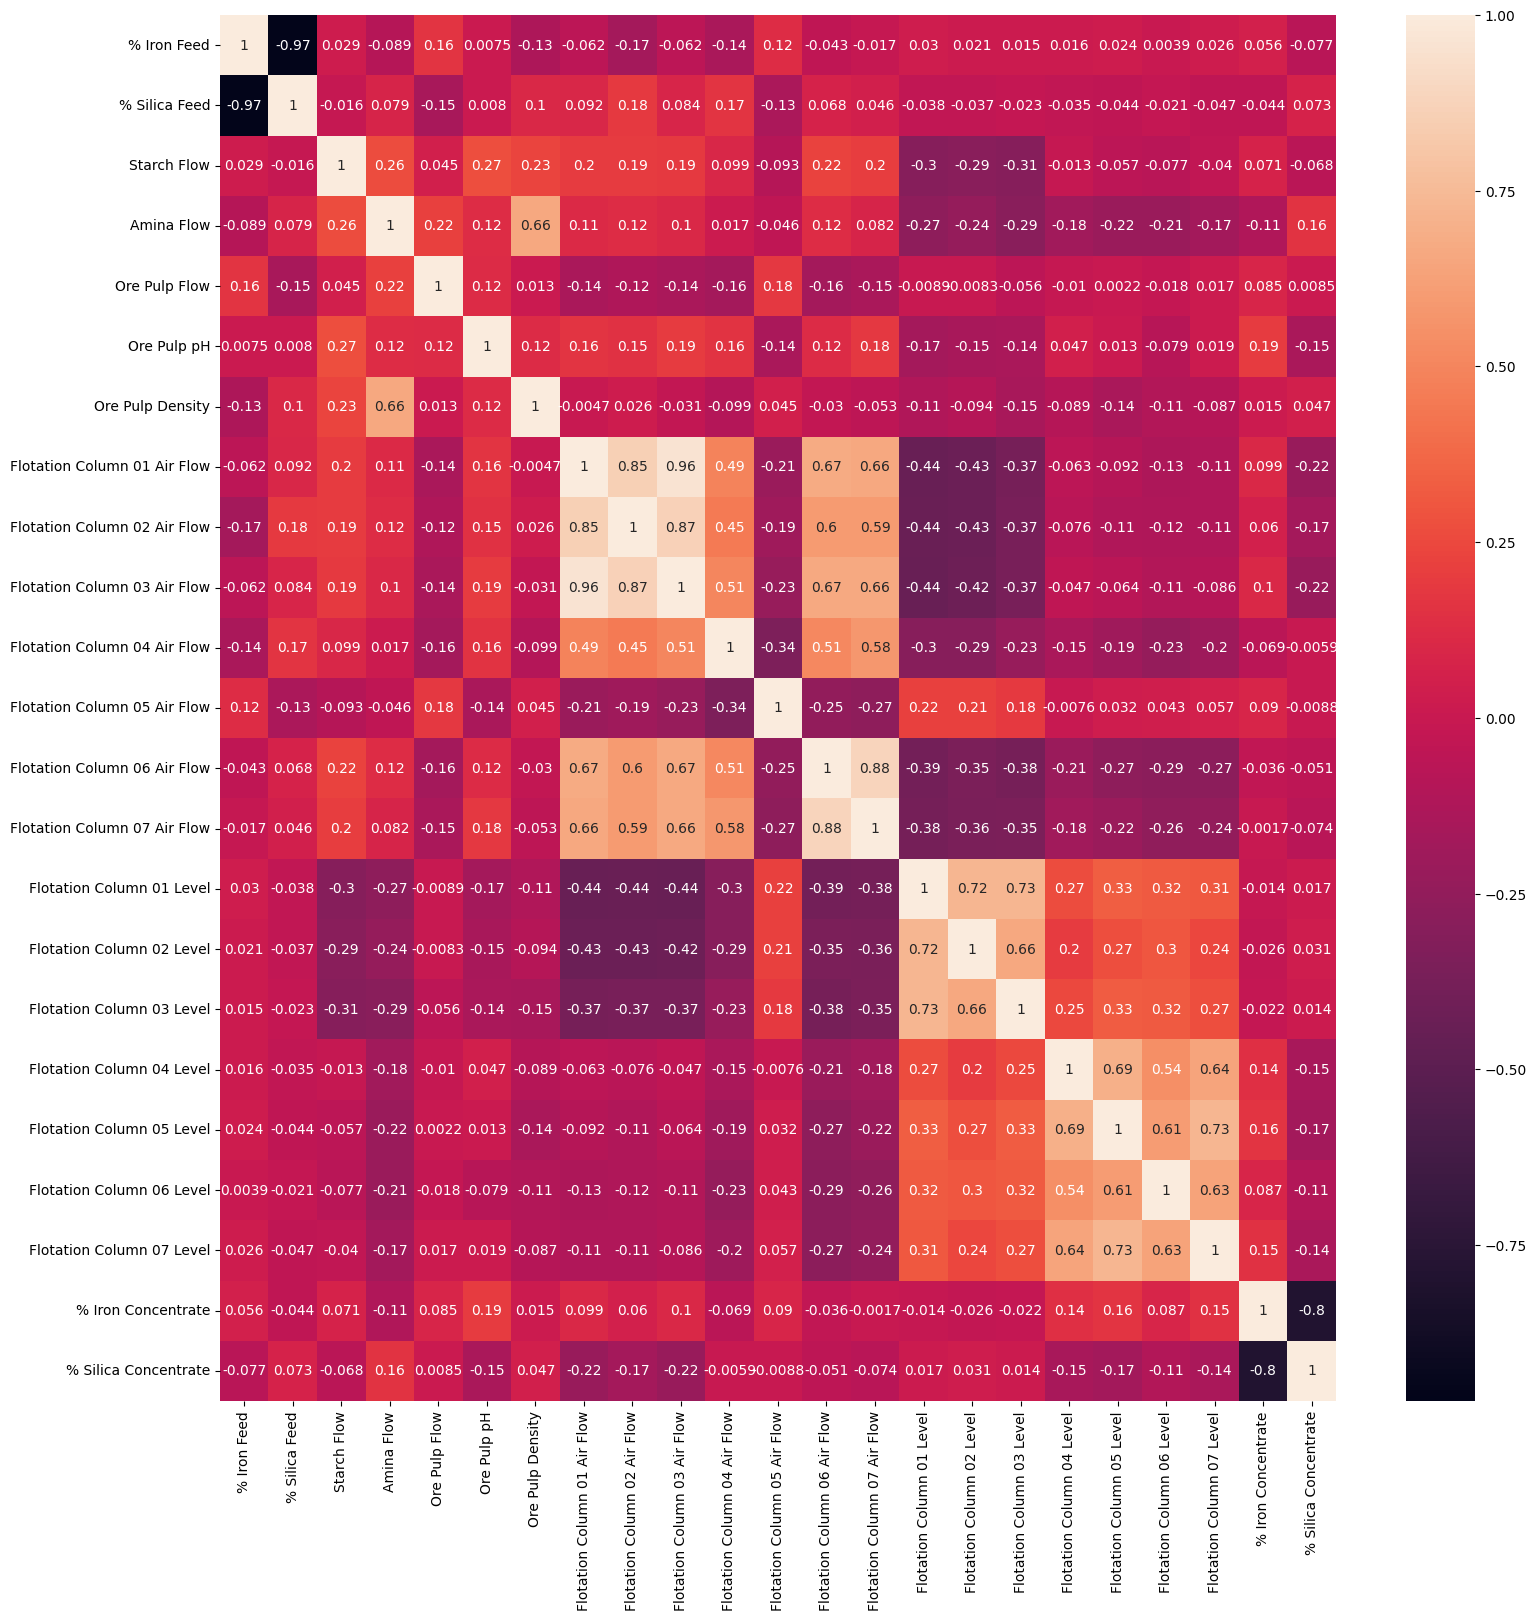

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(mining_df.corr(),annot=True)

<Axes: ylabel='% Silica Concentrate'>

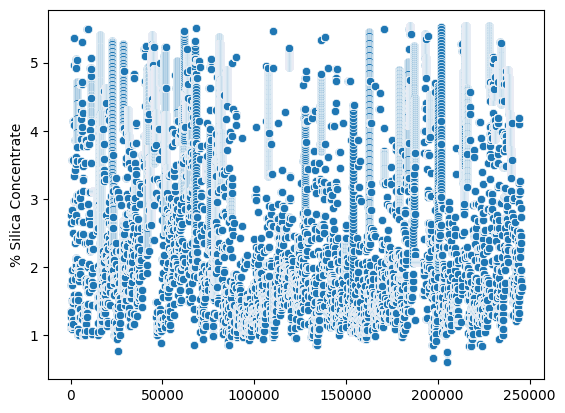

In [ ]:
sns.scatterplot(mining_df['% Silica Concentrate'])

In [ ]:
df_iron=mining_df.drop(columns='% Silica Concentrate')
df_iron_target=mining_df['% Silica Concentrate']

In [ ]:
df_iron.shape


(245700, 22)

In [ ]:
df_iron=np.array(df_iron)
df_iron_target=np.array(df_iron_target)

In [ ]:
df_iron_target=df_iron_target.reshape(-1,1)

In [ ]:
#scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler_x=StandardScaler()
X=scaler_x.fit_transform(df_iron)

scaler_y=StandardScaler()
y=scaler_y.fit_transform(df_iron_target)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.shape

(196560, 22)

In [ ]:
#multiple linear regresion:examine relationship between more that two variables

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score

LinearRegression_model=LinearRegression()
LinearRegression_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
accuracy_LinearRegression=LinearRegression_model.score(X_test,y_test)#we feed the model with data it has never seen before during training
accuracy_LinearRegression

0.6801852616271943

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree_model=DecisionTreeRegressor()
DecisionTree_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
accuracy_DecisionTree=DecisionTree_model.score(X_test,y_test)
accuracy_DecisionTree

0.9821577595469928

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RandomForest_model=RandomForestRegressor(n_estimators=100,max_depth=10)
RandomForest_model.fit(X_train,y_train)
accuracy_RandomForest=RandomForest_model.score(X_test,y_test)
accuracy_RandomForest


<ipython-input-52-99921cd4ec42>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest_model.fit(X_train,y_train)


0.8879546711187256

In [ ]:
#model of the neuron is a weighted multiplication

In [ ]:
#gradient descent is an optimization algorithm used to obtain the optimized network weight and
#bias values

#it works by iteratively trying to minimize the cost function

#

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam

optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False)
ANN_model=keras.Sequential()
ANN_model.add(Dense(250,input_dim=22,kernel_initializer='normal',activation='relu'))
ANN_model.add(Dense(500,activation='relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(1000,activation='relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(1000,activation='relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(500,activation='relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(250,activation='relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(1,activation='linear'))
ANN_model.compile(loss='mse',optimizer='adam')
ANN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 250)               5750      
                                                                 
 dense_9 (Dense)             (None, 500)               125500    
                                                                 
 dropout_5 (Dropout)         (None, 500)               0         
                                                                 
 dense_10 (Dense)            (None, 1000)              501000    
                                                                 
 dropout_6 (Dropout)         (None, 1000)              0         
                                                                 
 dense_11 (Dense)            (None, 1000)              1001000   
                                                                 
 dropout_7 (Dropout)         (None, 1000)             

In [ ]:
history=ANN_model.fit(X_train,y_train,epochs=5,validation_split=0.2)

In [ ]:
result=ANN_model.evaluate(X_test,y_test)
accuracy_ANN=1-result
print(f"Accuracy:{accuracy_ANN}")#as we train the model the loss will be minimized

1536/1536 [==============================] - 8s 6ms/step - loss: 0.0830
Accuracy:0.9170313626527786


In [ ]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

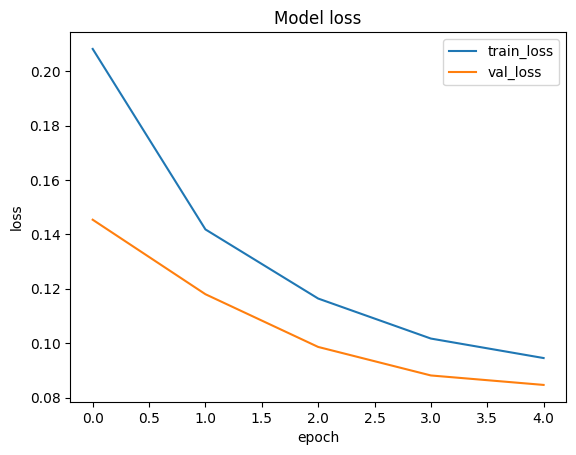

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss',],loc='upper right')
plt.show()

Text(0, 0.5, 'True Values')

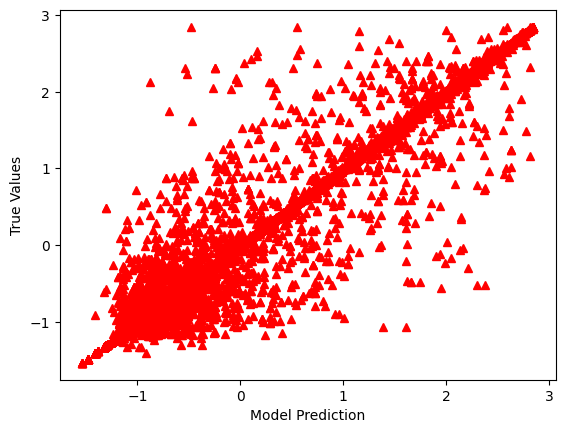

In [ ]:
y_predict=DecisionTree_model.predict(X_test)
plt.plot(y_predict,y_test,'^',color='r')
plt.xlabel('Model Prediction')
plt.ylabel('True Values')

In [ ]:
y_predict_orig=scaler_y.inverse_transform(y_predict)
y_test_orig=scaler_y.inverse_transform(y_test)
plt.plot(y_test_orig,y_predict_orig,'^',color='r')
plt.xlabel("Model Predictions")
plt.ylabel("True Values")

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from math import sqrt

In [ ]:
from tensorflow.python.ops.math_ops import mean
k=X_test.shape[1]
n=len(X_test)
RMSE=float(format(np.sqrt(mean_squared_error(y_test_orig,y_predict_orig)),'.3f'))
MSE=mean_squared_error(y_test_orig,y_predict_orig)
MAE=mean_absolute_error(y_test_orig,y_predict_orig)
r2=r2_score(y_test_orig,y_predict_orig)
adj_r2=1-(1-r2)*(n-1)/(n-k-1)

NameError: ignored